In [0]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [93]:
#upload zip file

!ls
from zipfile import ZipFile
file_name = "images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

images	images.zip  sample_data
Done


In [0]:
import os 
folders = os.listdir("images")

In [95]:
for f in folders:
  path="images/"+f
  print(f+" "+str(len(os.listdir(path))))


dogs 202
humans 202
cats 202
horses 202


In [96]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
path="images/"
img=image.load_img("images/cats/cat.1.jpg")
print(type(img))

#numpy
#plt.imshow()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


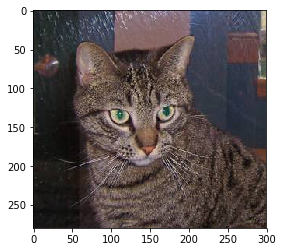

In [97]:
plt.imshow(img)
plt.show()

x=image.img_to_array(img)/255.0

In [98]:
from keras.layers import *
from keras.models import Sequential
model = Sequential()
                #no of filter,filter_size,activation,inputs-shape
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D((2,2))) #filter_size=2,2  stride=2,2   incresing the receptive field
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))  #so we need more no of filters
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
flatten_15 (Flatten)         (None, 147968)            0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                9470016   
__________

In [99]:
from keras.layers import *
from keras.models import Sequential
model = Sequential()
                #no of filter,filter_size,activation,inputs-shape
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D((2,2))) #filter_size=2,2  stride=2,2   incresing the receptive field
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))  #so we need more no of filters
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

# added more convolutional layers and maxPool layers increase the receptive field

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
## now we are not using fit method(best for small dataset) , we are using data_generators of keras 

In [0]:
from keras import optimizers         
adam=optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=["acc"])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
ImageDataGenerator?

In [104]:
train_gen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_gen.flow_from_directory("images/",target_size=(150,150),class_mode='categorical',batch_size=(32))


Found 808 images belonging to 4 classes.


In [105]:
print(train_generator.labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [106]:
for x,y in train_generator:
  print(x.shape)  
  print(y.shape)  #one_hot
  break

(32, 150, 150, 3)
(32, 4)


In [0]:
 model.fit_generator?

In [109]:
                                   #batch size=32 , 32*7=224 , total_images=210
history=model.fit_generator(train_generator,steps_per_epoch=7,epochs=40)

Epoch 1/40
7/7 [==============================] - 9s 1s/step - loss: 0.9983 - acc: 0.5869
Epoch 2/40
7/7 [==============================] - 10s 1s/step - loss: 0.9844 - acc: 0.6161
Epoch 3/40
7/7 [==============================] - 10s 1s/step - loss: 1.0219 - acc: 0.5491
Epoch 4/40
7/7 [==============================] - 10s 1s/step - loss: 1.0266 - acc: 0.5670
Epoch 5/40
7/7 [==============================] - 9s 1s/step - loss: 0.8802 - acc: 0.6684
Epoch 6/40
7/7 [==============================] - 10s 1s/step - loss: 0.9582 - acc: 0.6027
Epoch 7/40
7/7 [==============================] - 10s 1s/step - loss: 0.9861 - acc: 0.6384
Epoch 8/40
7/7 [==============================] - 9s 1s/step - loss: 0.9853 - acc: 0.5914
Epoch 9/40
7/7 [==============================] - 10s 1s/step - loss: 0.9358 - acc: 0.6161
Epoch 10/40
7/7 [==============================] - 10s 1s/step - loss: 0.9142 - acc: 0.6116
Epoch 11/40
7/7 [==============================] - 10s 1s/step - loss: 0.8871 - acc: 0.6652
